<a href="https://colab.research.google.com/github/fathursidiq/CNNtampalibrary/blob/main/D_cnn_fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Activation, Flatten, MaxPooling1D, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
#df = pd.read_csv('/content/drive/MyDrive/8.CSV', delimiter=';')
#ac=np.array(df['CH1'])
#number=np.array(df['Number'])

In [ ]:

def load_data_from_folder(folder_path):
    csv_files = glob.glob(os.path.join(folder_path, '*.CSV'))
    data_list = []
    for csv_file in csv_files:
        df = pd.read_csv(csv_file, delimiter=';')
        data_list.append(df.filter(like='CH').values)

    return data_list
folder_path = '/content/drive/MyDrive/thesis/Microtremor Data'

data_list = load_data_from_folder(folder_path)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class HighPassFilter:
    def __init__(self, alpha):
        self.alpha = alpha
        self.last_input = 0.0
        self.last_output = 0.0

    def apply_filter(self, input):
        output = self.alpha * (self.last_output + input - self.last_input)
        self.last_input = input
        self.last_output = output
        return output

# Assuming data_list is a list of lists with multiple columns
# Replace this with your actual data

# Convert list of lists to a NumPy array
data_array = np.array(data_list)

alpha = 0.999
filtered_data = np.zeros_like(data_array)

# Apply high-pass filter to each column
for col in range(data_array.shape[1]):
    highPassFilter = HighPassFilter(alpha)
    filtered_data[:, col] = [highPassFilter.apply_filter(value) for value in data_array[:, col]]

# Plot original and filtered data
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data_array, label='Original Data')
plt.title('Original Data')
plt.subplot(2, 1, 2)
plt.plot(filtered_data, label='Filtered Data', color='orange')
plt.title('High-Pass Filtered Data')
plt.tight_layout()
plt.show()


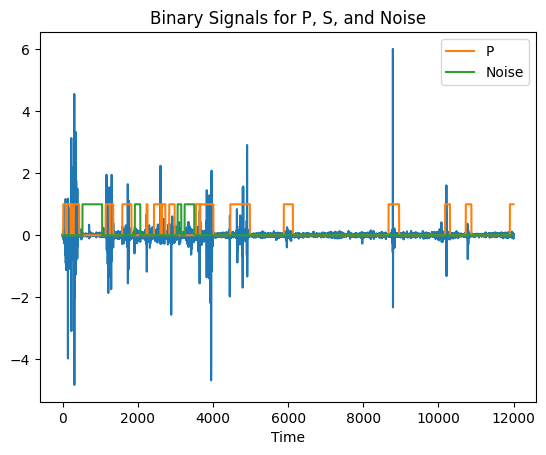

In [ ]:

data = [
    {
        "id": 8,
        "annotations": [
            {
                "id": 3,
                "result": [
                    {"value": {"start": 16, "end": 94, "timeserieslabels": ["P"]}},
                    {"value": {"start": 166, "end": 214, "timeserieslabels": ["P"]}},
                    {"value": {"start": 1587, "end": 1743, "timeserieslabels": ["P"]}},
                    {"value": {"start": 297, "end": 329, "timeserieslabels": ["P"]}},
                    {"value": {"start": 1144, "end": 1257, "timeserieslabels": ["P"]}},
                    {"value": {"start": 1269, "end": 1347, "timeserieslabels": ["P"]}},
                    {"value": {"start": 2232, "end": 2257, "timeserieslabels": ["P"]}},
                    {"value": {"start": 227, "end": 264, "timeserieslabels": ["P"]}},
                    {"value": {"start": 114, "end": 179, "timeserieslabels": ["P"]}},
                    {"value": {"start": 2643, "end": 2733, "timeserieslabels": ["P"]}},
                    {"value": {"start": 2430, "end": 2605, "timeserieslabels": ["P"]}},
                    {"value": {"start": 1921, "end": 2066, "timeserieslabels": ["Noise"]}},
                    {"value": {"start": 527, "end": 1051, "timeserieslabels": ["Noise"]}},
                    {"value": {"start": 2835, "end": 2981, "timeserieslabels": ["P"]}},
                    {"value": {"start": 1740, "end": 1831, "timeserieslabels": ["P"]}},
                    {"value": {"start": 3662, "end": 4011, "timeserieslabels": ["P"]}},
                    {"value": {"start": 4462, "end": 4983, "timeserieslabels": ["P"]}},
                    {"value": {"start": 8672, "end": 8953, "timeserieslabels": ["P"]}},
                    {"value": {"start": 10176, "end": 10306, "timeserieslabels": ["P"]}},
                    {"value": {"start": 5885, "end": 6126, "timeserieslabels": ["P"]}},
                    {"value": {"start": 10727, "end": 10877, "timeserieslabels": ["P"]}},
                    {"value": {"start": 11900, "end": 12000, "timeserieslabels": ["P"]}},
                    {"value": {"start": 3245, "end": 3502, "timeserieslabels": ["Noise"]}},
                    {"value": {"start": 3058, "end": 3157, "timeserieslabels": ["Noise"]}},
                    {"value": {"start": 3573, "end": 3645, "timeserieslabels": ["P"]}},
                    {"value": {"start": 3546, "end": 3623, "timeserieslabels": ["P"]}},
                    {"value": {"start": 302, "end": 439, "timeserieslabels": ["P"]}}
                ]
            }
        ]
    }
]

max_end = max(result["value"]["end"] for annotation in data[0]["annotations"] for result in annotation["result"])
signal_values_p = np.zeros(max_end)
signal_values_noise = np.zeros(max_end)

# Iterate through the data
for annotation in data[0]["annotations"]:
    for result in annotation["result"]:
        start = result["value"]["start"]
        end = result["value"]["end"]
        label = result["value"]["timeserieslabels"][0]

        # Set values to 1 within the specified range for each label
        if label == "P":
            signal_values_p[start:end] = 1
        elif label == "Noise":
            signal_values_noise[start:end] = 1

# Plot the signals for each label
plt.plot(ac*0.1)
plt.plot(signal_values_p, label='P')
plt.plot(signal_values_noise, label='Noise')


plt.xlabel('Time')
plt.title('Binary Signals for P, S, and Noise')
plt.legend()
plt.show()


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 1, 32)             6432      
                                                                 
 activation_24 (Activation)  (None, 1, 32)             0         
                                                                 
 max_pooling1d_24 (MaxPooli  (None, 1, 32)             0         
 ng1D)                                                           
                                                                 
 conv1d_25 (Conv1D)          (None, 1, 8)              25608     
                                                                 
 activation_25 (Activation)  (None, 1, 8)              0         
                                                                 
 max_pooling1d_25 (MaxPooli  (None, 1, 8)              0         
 ng1D)                                               

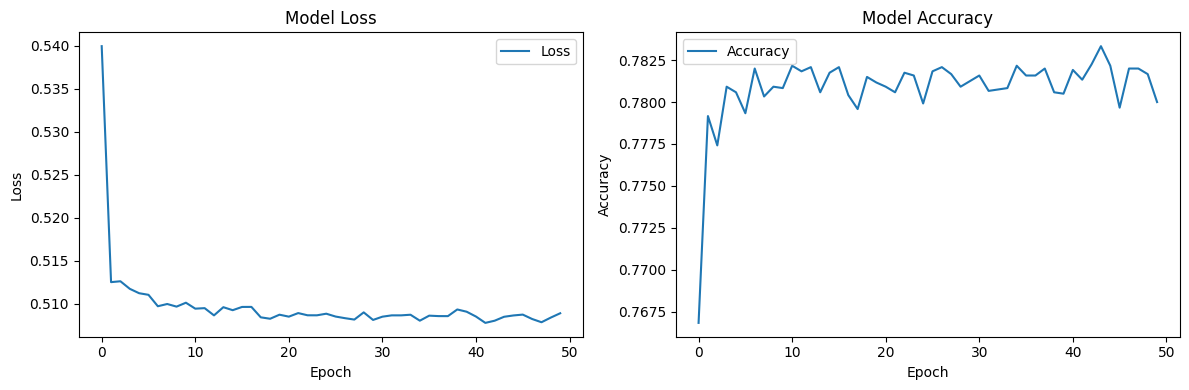

375/375 [==============================] - 1s 3ms/step


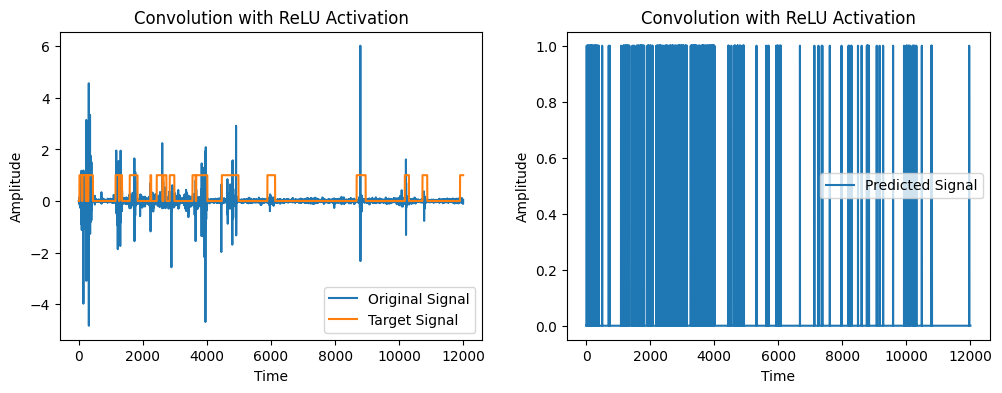

Model saved at /content/drive/MyDrive/thesis/delmodel/dcnn_segmentation.h5
Epoch 1/50
300/300 [==============================] - 2s 5ms/step - loss: 0.5263 - accuracy: 0.7652 - val_loss: 0.4252 - val_accuracy: 0.8471
Epoch 2/50
300/300 [==============================] - 1s 4ms/step - loss: 0.5277 - accuracy: 0.7660 - val_loss: 0.4524 - val_accuracy: 0.8379
Epoch 3/50
300/300 [==============================] - 1s 4ms/step - loss: 0.5267 - accuracy: 0.7656 - val_loss: 0.4243 - val_accuracy: 0.8475
Epoch 4/50
300/300 [==============================] - 2s 5ms/step - loss: 0.5266 - accuracy: 0.7655 - val_loss: 0.4293 - val_accuracy: 0.8450
Epoch 5/50
300/300 [==============================] - 2s 5ms/step - loss: 0.5274 - accuracy: 0.7660 - val_loss: 0.4310 - val_accuracy: 0.8483
Epoch 6/50
300/300 [==============================] - 1s 4ms/step - loss: 0.5274 - accuracy: 0.7653 - val_loss: 0.4249 - val_accuracy: 0.8471
Epoch 7/50
300/300 [==============================] - 1s 4ms/step - loss:

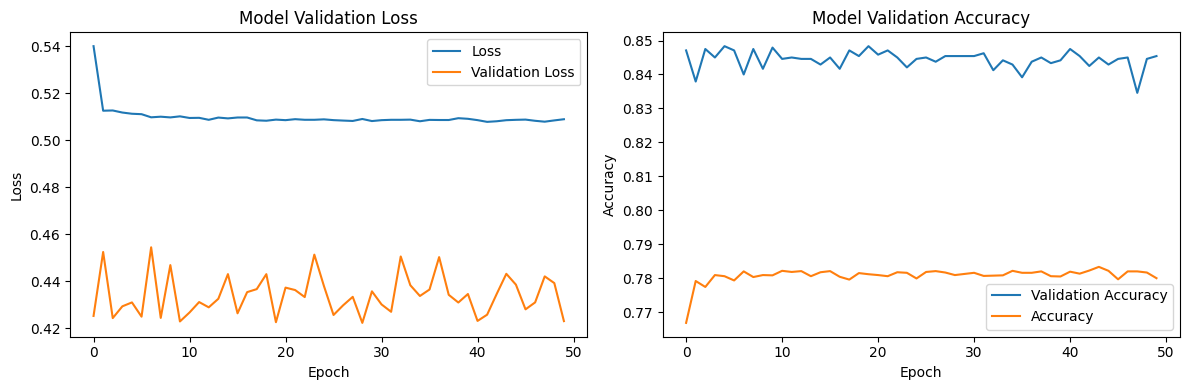

In [ ]:
class DCNN:
    def __init__(self, input_signal, target_signal):
        self.input_signal = input_signal
        self.target_signal = target_signal
        self.model = Sequential()
        self.history = None  # To store training history

    def preprocess_signals(self):
        # Reshape the signals for compatibility with Conv1D layer
        self.input_signal = self.input_signal.reshape((-1, 1, 1))
        self.target_signal = to_categorical(self.target_signal)  # One-hot encode target values

    def build_model(self, learning_rate=0.001):  # Set a default learning rate
        signal_length = self.input_signal.shape[1]
        num_classes = self.target_signal.shape[1]
        self.model = Sequential()
        self.model.add(Conv1D(filters=32, kernel_size=200, input_shape=(signal_length, 1), padding='same'))
        self.model.add(Activation('relu'))
        self.model.add(MaxPooling1D(pool_size=2, padding='same'))
        self.model.add(Conv1D(filters=8, kernel_size=100, input_shape=(signal_length, 1), padding='same'))
        self.model.add(Activation('relu'))
        self.model.add(MaxPooling1D(pool_size=2, padding='same'))
        self.model.add(Conv1D(filters=3, kernel_size=10, input_shape=(signal_length, 1), padding='same'))
        self.model.add(Activation('relu'))
        self.model.add(MaxPooling1D(pool_size=1, padding='same'))
        self.model.add(Flatten())
        self.model.add(Dense(num_classes, activation='softmax'))
        optimizer = Adam(learning_rate=learning_rate)

        self.model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        self.model.summary()

    def train_model(self, epochs=50):
        self.history = self.model.fit(self.input_signal, self.target_signal, epochs=epochs, verbose=1)

    def val_model(self, epochs=50):  # Corrected the parameter name
        if self.input_signal is not None and self.target_signal is not None:
            history = self.model.fit(self.input_signal, self.target_signal, epochs=epochs, verbose=1, validation_split=0.2)
            return history
        else:
            print("Input and target signals must be preprocessed before validation.")
            return None

    def plot_training_history(self):
        if self.history is not None:
            # Plot training loss and accuracy over epochs
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            plt.plot(self.history.history['loss'], label='Loss')
            plt.title('Model Loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.legend()
            plt.subplot(1, 2, 2)
            plt.plot(self.history.history['accuracy'], label='Accuracy')
            plt.title('Model Accuracy')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.legend()
            plt.tight_layout()
            plt.show()

    def predict_signals(self):
        output_signal = self.model.predict(self.input_signal)
        return self.input_signal.squeeze(), np.argmax(self.target_signal, axis=1), np.argmax(output_signal, axis=1)

    def plot_signals(self):
        original_signal, target_signal, convolved_signal = self.predict_signals()

        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(original_signal, label='Original Signal')
        plt.plot(target_signal, label='Target Signal')
        plt.legend()
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.title('Convolution with ReLU Activation')
        plt.subplot(1, 2, 2)
        plt.plot(convolved_signal, label='Predicted Signal')
        plt.legend()
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.title('Convolution with ReLU Activation')
        plt.show()

    def run(self, epochs=50, validation_epochs=50, save_path='model.h5', learning_rate=0.01):  # Specify the save path
        self.preprocess_signals()
        self.build_model(learning_rate=learning_rate)
        self.train_model(epochs=epochs)
        self.plot_training_history()
        self.plot_signals()

        # Save the trained model
        self.model.save(save_path)
        print(f"Model saved at {save_path}")

        # Validate the model
        val_history = self.val_model(epochs=validation_epochs)
        if val_history is not None:
            # Optionally, you can plot the validation history
            self.plot_validation_history(val_history)

    def plot_validation_history(self, val_history):
        if val_history is not None:
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            plt.plot(self.history.history['loss'], label='Loss')
            plt.plot(val_history.history['val_loss'], label='Validation Loss')
            plt.title('Model Validation Loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.legend()
            plt.subplot(1, 2, 2)
            plt.plot(val_history.history['val_accuracy'], label='Validation Accuracy')
            plt.plot(self.history.history['accuracy'], label='Accuracy')
            plt.title('Model Validation Accuracy')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.legend()
            plt.tight_layout()
            plt.show()


# Assuming ac and signal_values_p are defined earlier
signal_convolution = DCNN(ac * 0.1, signal_values_p)
signal_convolution.run(epochs=50, validation_epochs=50, save_path='/content/drive/MyDrive/thesis/delmodel/dcnn_segmentation.h5', learning_rate=0.01)


In [ ]:
signal_convolution = DCNN(ac * 0.1, signal_values_noise)
signal_convolution.run(epochs=10, save_path='/content/drive/MyDrive/thesis/delmodel/dcnn_segmentation_s.h5', learning_rate=0.0001)

NameError: ignored

rencana selanjutnya :
- test dan load signal with model data
- filter signal ekstractions